In [2]:
import pandas as pd
import numpy as np
import Levenshtein
import geopandas as geopd
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score

# Loading sampled data

In [6]:
path_data =  '../../data/interim/Brazil/election_data/2018/polling_places/address_to_check.csv'
data = pd.read_csv(path_data, sep=';', encoding='latin')
print("Size: {}".format(len(data)))
print("==============")
print("Precisions")
print(data['precision'].value_counts())
print("==============")
print("Labels")
print(data['same_address'].value_counts())

data.head()

Size: 400
Precisions
GEOMETRIC_CENTER      100
ROOFTOP               100
APPROXIMATE           100
RANGE_INTERPOLATED    100
Name: precision, dtype: int64
Labels
y    212
n    188
Name: same_address, dtype: int64


,query_address,fetched_address,precision,same_address
0,"POVOADO MORRO GRANDE, POVOADO MORRO GRANDE - Z...","Miranda do Norte - MA, 65495-000, Brasil",APPROXIMATE,n
1,"LOCALIDADE DE QUEIMADAS, QUEIMADAS - TAIÓ DE C...","Queimadas, PB, 58475-000, Brasil",APPROXIMATE,n
2,"POSTO VISTA ALEGRE DE LAGOA DIONÍSIO, POVOADO ...","Lagoa do Dionísio, Ibitiara - BA, 46700-000, B...",APPROXIMATE,y
3,"POVOADO SECO DAS MULATAS, POVOADO SECO DAS MUL...","2655 Ericeira, Portugal",APPROXIMATE,n
4,"VILA MINERACU, ZONA RURAL - SÃO FÉLIX DO XINGU...","São Félix do Xingu, PA, 68380-000, Brasil",APPROXIMATE,n


# Calculating levenshtein distance 
The distance is calculated between query address and fetched address

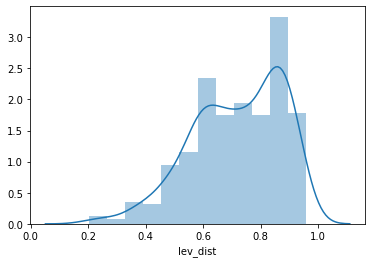

In [3]:
data['lev_dist'] = data.apply(lambda x: Levenshtein.ratio(x['query_address'].lower(),x['fetched_address'].lower()), axis=1)
sns.distplot(data['lev_dist'])

# Calculating optimum threshold 
The threshold is obtained by classifying the manually labeled address, and checking wich treshold can first get 100% precision on classifying same address.

In [65]:
all_precisions = []
all_threshold = []
optimun_threshold = -1
for threshold in np.arange(0,.95,.001):
    data['pred'] = data['lev_dist'].map(lambda x: 'y' if x > threshold else 'n')
    precision = precision_score(data['same_address'], data['pred'], pos_label='y')
    all_precisions = all_precisions + [precision]
    all_threshold = all_threshold + [threshold]
    if precision == 1 and optimun_threshold == -1:
        optimun_threshold = threshold
        
print('Optimum Threshold:',optimun_threshold)

Optimum Threshold: 0.803


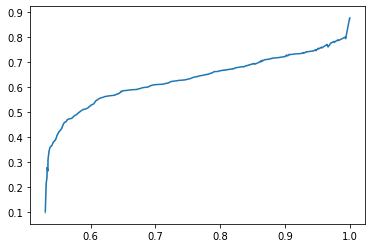

In [66]:
sns.lineplot(x=all_precisions, y=all_threshold)